In [1]:
import numpy as np
import PyPDF2
import docx2txt
import sys

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline 

In [3]:
import networkx as nx

In [4]:
from nltk.tokenize.punkt import PunktSentenceTokenizer

In [5]:
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer

In [6]:
def readDoc():
    name = input('Please input a file name: ') 
    print('You have asked for the document {}'.format(name))

    if name.lower().endswith('.txt'):
        choice = 1
    elif name.lower().endswith('.pdf'):
        choice = 2
    else:
        choice = 3
    print(choice)
   
    if choice == 1:
        f = open(name, 'r')
        document = f.read()
        f.close()
            
    elif choice == 2:
        pdfFileObj = open(name, 'rb')
        pdfReader = PyPDF2.PdfFileReader(pdfFileObj)
        pageObj = pdfReader.getPage(0)
        document = pageObj.extractText()
        pdfFileObj.close()
    
    else:
        print('Failed to load a valid file')
        print('Returning an empty string')
        document = ''
    
    print(type(document))
    return document

In [7]:
def tokenize(document):
    doc_tokenizer = PunktSentenceTokenizer()

    sentences_list = doc_tokenizer.tokenize(document)
    return sentences_list

In [8]:
document = readDoc()
print('The length of the file is:', end=' ')
print(len(document))

Please input a file name: AP880705-0109.txt
You have asked for the document AP880705-0109.txt
1
<class 'str'>
The length of the file is: 3118


In [9]:
sentences_list = tokenize(document)
print('The size of the list in Bytes is: {}'.format(sys.getsizeof(sentences_list)))
print('The size of the item 0 in Bytes is: {}'.format(sys.getsizeof(sentences_list[0])))

The size of the list in Bytes is: 344
The size of the item 0 in Bytes is: 215


In [10]:
print(type(sentences_list))

<class 'list'>


In [11]:
print('The size of the list "sentences" is: {}'.format(len(sentences_list)))

The size of the list "sentences" is: 26


In [12]:
for i in sentences_list:
    print(i)

   Firefighters in California, Michigan, Montana, Wyoming and Utah battled holiday weekend fires which blackened more than 6,000 acres of forest and wilderness areas.
Illegal fireworks were blamed for a blaze that swept over 2,200 rugged acres of Stanislaus National Forest in California, 10 miles west of Yosemite National Park.
The fire, which began Saturday, was declared contained this morning,    ``We have evidence confirming that it was a bottle rocket,'' said Mary Hale, a spokeswoman for the California Department of Forestry.
The fire was the largest in the forest this year.
Stanislaus was the scene of huge wildfires last summer.
In southern Utah's scenic Zion National Park, firefighters tried today to contain a 600-acre fire that was ignited by lightning June 19 but had been allowed to burn in a small area.
However, on Sunday, winds ranging from 30 mph to 60 mph fanned the flames out of control, Chief Ranger Bob Andrew said.
Firefighters, assisted by water-carrying aircraft, expec

In [13]:
cv = CountVectorizer()
cv_matrix = cv.fit_transform(sentences_list)

In [14]:
cv_demo = CountVectorizer()
text_demo = ["Goutham is good, you are bad", "I am not bad"] 
res_demo = cv_demo.fit_transform(text_demo)
print('Result demo array is {}'.format(res_demo.toarray()))
print('Feature list: {}'.format(cv_demo.get_feature_names()))

Result demo array is [[0 1 1 1 1 1 0 1]
 [1 0 1 0 0 0 1 0]]
Feature list: ['am', 'are', 'bad', 'good', 'goutham', 'is', 'not', 'you']


In [15]:
print('The data type of bow matrix {}'.format(type(cv_matrix)))
print('Shape of the matrix {}'.format(cv_matrix.get_shape))
print('Size of the matrix is: {}'.format(sys.getsizeof(cv_matrix)))
print(cv.get_feature_names())
print(cv_matrix.toarray())

The data type of bow matrix <class 'scipy.sparse.csr.csr_matrix'>
Shape of the matrix <bound method spmatrix.get_shape of <26x251 sparse matrix of type '<class 'numpy.int64'>'
	with 449 stored elements in Compressed Sparse Row format>>
Size of the matrix is: 56
['000', '10', '100', '19', '200', '30', '60', '600', '650', '700', 'about', 'absaroka', 'acre', 'acres', 'agreed', 'aircraft', 'allowed', 'allows', 'also', 'although', 'an', 'and', 'andrew', 'area', 'areas', 'ariz', 'as', 'assisted', 'banks', 'battled', 'be', 'beartooth', 'been', 'before', 'began', 'being', 'blackened', 'blamed', 'blaze', 'bluedorn', 'bob', 'bogs', 'bottle', 'boundary', 'bulk', 'burn', 'burned', 'burning', 'but', 'by', 'california', 'called', 'calmer', 'carrying', 'central', 'chief', 'concentrated', 'confirming', 'contain', 'contained', 'contingent', 'continue', 'continued', 'control', 'cooler', 'could', 'county', 'custer', 'dale', 'damage', 'damped', 'damron', 'dave', 'day', 'declared', 'delta', 'department', '

In [16]:
normal_matrix = TfidfTransformer().fit_transform(cv_matrix)
print(normal_matrix.toarray())

[[0.21134172 0.         0.         ... 0.         0.         0.        ]
 [0.         0.23195222 0.         ... 0.         0.23195222 0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [17]:
print(normal_matrix.T.toarray)
res_graph = normal_matrix * normal_matrix.T
# plt.spy(res_graph)

<bound method _cs_matrix.toarray of <251x26 sparse matrix of type '<class 'numpy.float64'>'
	with 449 stored elements in Compressed Sparse Column format>>


Number of edges 262
Number of vertices 26


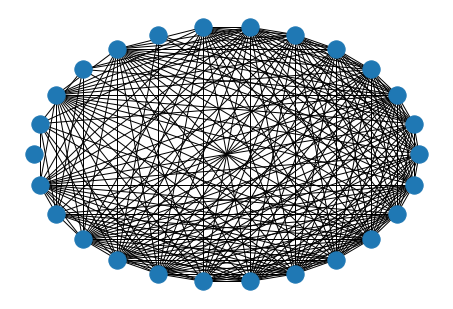

The memory used by the graph in Bytes is: 56


In [18]:
nx_graph = nx.from_scipy_sparse_matrix(res_graph)
nx.draw_circular(nx_graph)
print('Number of edges {}'.format(nx_graph.number_of_edges()))
print('Number of vertices {}'.format(nx_graph.number_of_nodes()))
plt.show()
print('The memory used by the graph in Bytes is: {}'.format(sys.getsizeof(nx_graph)))

In [19]:
ranks = nx.pagerank(nx_graph)
print(type(ranks))
print('The size used by the dictionary in Bytes is: {}'.format(sys.getsizeof(ranks)))
for i in ranks:
    print(i, ranks[i])


<class 'dict'>
The size used by the dictionary in Bytes is: 1184
0 0.035835039636070196
1 0.03938711481255189
2 0.044869855006216465
3 0.051008227331651855
4 0.03272700117096447
5 0.04228376254566082
6 0.035607020547653814
7 0.032493184859022126
8 0.027793186552941877
9 0.04722288740661005
10 0.030764627634967172
11 0.032701855618993816
12 0.030480199290228657
13 0.005964214711729624
14 0.03054965707311636
15 0.034606295220216444
16 0.045302011259730324
17 0.035714913591382104
18 0.04823363579381456
19 0.03159563351942693
20 0.053614173285682604
21 0.042751867483776865
22 0.04794457774297719
23 0.050676662700637816
24 0.04355285432901461
25 0.0463195408749613


In [20]:
sentence_array = sorted(((ranks[i], s) for i, s in enumerate(sentences_list)), reverse=True)
sentence_array = np.asarray(sentence_array)

In [21]:
rank_max = float(sentence_array[0][0])
rank_min = float(sentence_array[len(sentence_array) - 1][0])

In [22]:
print(rank_max)
print(rank_min)

0.053614173285682604
0.005964214711729624


In [23]:
temp_array = []
flag = 0
if rank_max - rank_min == 0:
    temp_array.append(0)
    flag = 1
if flag != 1:
    for i in range(0, len(sentence_array)):
        temp_array.append((float(sentence_array[i][0]) - rank_min) / (rank_max - rank_min))

print(len(temp_array))

26


In [24]:
threshold = (sum(temp_array) / len(temp_array)) + 0.2

In [25]:
sentence_list = []
if len(temp_array) > 1:
    for i in range(0, len(temp_array)):
        if temp_array[i] > threshold:
                sentence_list.append(sentence_array[i][1])
else:
    sentence_list.append(sentence_array[0][1])

In [26]:
model = sentence_list

In [27]:
summary = " ".join(str(x) for x in sentence_list)
print(summary)
f = open('final3.txt', 'a+')
f.write('\n')
f.write(summary)
f.close

Phil Jaquith, Beartooth District ranger for the Custer National Forest, said the bulk of the fire on the east banks of the Stillwater River was not being suppressed. The fire was the largest in the forest this year. Fire information officer Dave Damron said water was also being pumped out of bogs in the Shoshone forest to help contain the fire. The firefighters were called in to stop the flames as they neared the Stillwater River Trail inside the wilderness area.


<function TextIOWrapper.close()>

In [28]:
for lines in sentence_list:
    print(lines)

Phil Jaquith, Beartooth District ranger for the Custer National Forest, said the bulk of the fire on the east banks of the Stillwater River was not being suppressed.
The fire was the largest in the forest this year.
Fire information officer Dave Damron said water was also being pumped out of bogs in the Shoshone forest to help contain the fire.
The firefighters were called in to stop the flames as they neared the Stillwater River Trail inside the wilderness area.


In [3]:
# -*- coding: utf-8 -*-
from __future__ import print_function
from pythonrouge.pythonrouge import Pythonrouge
from pprint import pprint

if __name__ == '__main__':
    reference = './sample/reference/plos2.txt'
    print('evaluate sumamry & reference in these dirs')
    print('summary:\t{}\nreference:\t{}'.format(summary, reference))
    rouge = Pythonrouge(summary_file_exist=True,
                        peer_path=summary, model_path=reference,
                        n_gram=2, ROUGE_SU4=True, ROUGE_L=False,
                        recall_only=False, f_measure_only=False,
                        stemming=True, stopwords=True,
                        word_level=True, length_limit=True, length=50,
                        use_cf=True, cf=95, scoring_formula='average',
                        resampling=True, samples=1000, favor=True, p=0.5)
    score = rouge.calc_score()
    print('ROUGE-N(1-2) & SU4 recall & f-measure with confidence interval')
    pprint(score)
    print('Evaluate ROUGE based on sentecnce lists')
    """
    ROUGE evaluates all system summaries and its corresponding reference
    a summary or summaries at onece.
    Summary should be double list, in each list has each summary.
    Reference summaries should be triple list because some of reference
    has multiple gold summaries.
    """
    summary = [["Phil Jaquith, Beartooth District ranger for the Custer National Forest",
                " said the bulk of the fire on the east banks of the Stillwater River was not being suppressed.\
                The fire was the largest in the forest this year. Fire information officer Dave Damron",
                "water was also being pumped out of bogs in the Shoshone forest to help contain the fire\
                The firefighters were called in to stop the flames"],
               ["as they neared the Stillwater River Trail inside the wilderness area."]]
    reference = [
                 [[" Firefighters in California, Michigan, Montana, Wyoming and Utah battled holiday weekend fires which blackened more than 6,000 acres of forest and wilderness areas. "],
                  ["`It's been real quiet out there,'' Sgt. Terry Leisening of the Delta County Sheriff's Department said today."],
                  ["It may not be declared out until there's a three-day rain,'' he said Monday.    A small contingent of firefighters who hiked into the Absaroka-Beartooth Wilderness",
                  " Forest Service policy allows wilderness fires to burn unless they threaten trails or structures, or threaten to burn outside the wilderness boundary."]],
                 [[" Phil Jaquith, Beartooth District ranger for the Custer National Forest, said the bulk of the fire on the east banks of the Stillwater River was not being suppressed.",
                   "Fire information officer Dave Damron said water was also being pumped out of bogs in the Shoshone forest to help contain the fire."],
                  [" Firefighters concentrated on keeping the fire entering the Du Noir Special Management Area a few miles to the north, Damron said. ",
                  "Three-quarters of an inch of rain on Monday helped slow a fire"]]
                  ]
    rouge = Pythonrouge(summary_file_exist=False,
                        summary=summary, reference=reference,
                        n_gram=2, ROUGE_SU4=True, ROUGE_L=False,
                        recall_only=True, stemming=True, stopwords=True,
                        word_level=True, length_limit=True, length=50,
                        use_cf=True, cf=95, scoring_formula='average',
                        resampling=True, samples=1000, favor=True, p=0.5)
    score = rouge.calc_score()
    print('ROUGE-N(1-2) & SU4 recall only with confidence interval')
    pprint(score)

evaluate sumamry & reference in these dirs


NameError: name 'summary' is not defined